# Caracterización de Sistemas en el Dominio del Tiempo
*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de un Péndulo Elástico Amortiguado

El [péndulo elástico](https://en.wikipedia.org/wiki/Spring_pendulum) amortiguado es un ejemplo de un sistema mecánico que puede ser modelado por una ecuación diferencial ordinaria lineal (EDO) con coeficientes constantes. Desde el punto de vista de la teoría de señales y sistemas, puede ser interpretado como un sistema lineal invariante en el tiempo (SLIT). Las propiedades mecánicas del péndulo elástico amortiguado se analizan utilizando la teoría de los SLIT. La configuración mecánica subyacente se muestra en la siguiente

![Péndulo Elástico Amortiguado](damped_spring.png)

Un cuerpo rígido de masa $m$ está montado sobre un resorte con rigidez $k$ que está conectado al suelo. Un amortiguador con un coeficiente de amortiguamiento $c$ se monta paralelo al resorte para modelar la fricción presente en el sistema. Se asume que el movimiento de la masa a lo largo del tiempo está restringido al eje vertical, aquí indicado por $y$. Además, se asume que la masa no se mueve para $ t <0 $. Denotando el desplazamiento de la masa con respecto al tiempo con $y(t)$, las condiciones iniciales se formulan como $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

Se utilizarán los siguientes valores $m = 0.1$,  $c = 0.1$ y $k = 2.5$ para ilustrar de manera más sencilla el siguiente ejemplo.

### Ecuación Diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

Donde $F_\text{E}(t) $ denota una fuerza externa que actúa sobre la masa. La fuerza $F_\text{S}(t)$ inducida por el resorte está dada por la [ley de Hooke](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.
La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

### Comparación con la Red Eléctrica

Comparando las EDO del péndulo elástico amortiguado y el [filtro pasa bajas analógico de segundo orden](http://localhost:8888/notebooks/systems_time_domain/network_analysis.ipynb#Differential-Equation), se tiene que ambas constituyen una EDO de segundo orden con coeficientes constantes. La división de la EDO del filtro pasa bajas analógico de segundo orden por la constante $C$ resulta en

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

Donde $u_\text{i}(t)$ y $u_\text{o}(t)$ denotan el voltaje de entrada y salida del circuito respesctivamente.
La comparación de la EDO anterior con la del péndulo elástico amortiguado produce [equivalencia entre sistemas](https://en.wikipedia.org/wiki/System_equivalence) así

|                         | Filtro pasa bajas de segundo orden | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
| Señal de entrada $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$  | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| Señal de salida $y(t)$  | $u_\text{o}(t)$                    | $y(t)$                                    |
|                         | $L=m$                              | $m=L$                                     |
|                         | $R=c$                              | $c=R$                                     |
|                         | $C=\frac{1}{k}$                    | $k=\frac{1}{C}$                           |

### Respuesta al Impulso

El SLTI correspondiente al péndulo puede ser caracterizado por su [respuesta al impulso](impulse_response.ipynb) $h(t)$. Se define como la salida del sistema ante una entra $x(t) = \delta(t)$ en la entrada. La respuesta al impulso caracteriza el movimiento $y(t)$ de la masa ante un evento.

Primero, se define la EDO del péndulo elástico amortiguado con `SymPy`

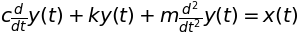

In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

Se guardan los valores de las constantes en un diccionario para posteriores sustituciones

In [3]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

La respuesta al impulso se calcula al resolver la EDO

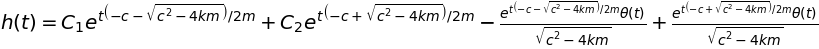

In [4]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

Las constantes de integración $C_1$ y $C_2$ se determinan a partir de las condiciones iniciales $y(t) = 0$ y $\frac{d y(t)}{dt}=0$ para $t<0$. 

In [5]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior, produce la respuesta al impulso del sistema mecánico

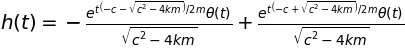

In [6]:
h = solution_h.subs(integration_constants)
h

Se grafica la respuesta para los valores de $m$, $c$ y $k$ definidas anteriormente

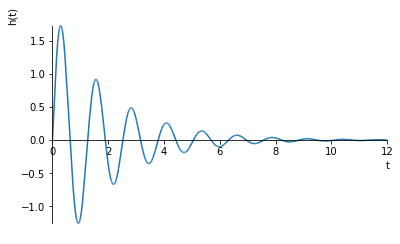

In [7]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

### Función de Transferencia

Para una señal exponencial de entrada $x(t)=e^{st}$, la [función de transferencia](eigenfunctions.ipynb#Transfer-Function) $H(s)$ representa el peso de la entrada, tal que $y(t) = H(s) \cdot e^{s t}$. La función de transferencia se obtiene al introducir $x(t)$ y $y(t)$ en la EDO y resolver para $H(s)$

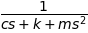

In [8]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

Las características de transferencia de un SLTI para señales exponenciales armónicas $e^{j\omega}=\cos(\omega t)+j\sin(\omega t)$ son de especial interés en el análisis de sistemas resonantes. Se pueden derivar de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$. La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica.

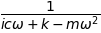

In [9]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

La magnitud de la función de transferencia $|H(j\omega)|$ se grafica para los valores de los parámetros dados anteriormente

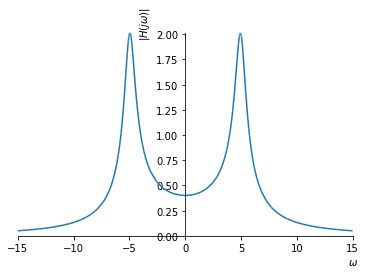

In [10]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Al inspeccionar la magnitud de la función de transferencia, se hace evidente que el péndulo del resorte amortiguado muestra resonancias (picos máximos) para dos frecuencias angulares específicas. Estas frecuencias de resonancia $\omega_0$ se calculan desde los valores extremos de $|H(j\omega)|$. Primero se calcula la derivada de $|H(j\omega)|$ con respecto a $\omega$ y luego se igual a cero

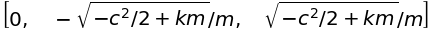

In [11]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

Para los máximos de la función de transferencia solo es de interés el segundo y el tercer extremo

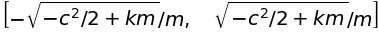

In [12]:
w0 = extrema[1:3]
w0

Las frecuencias de resonancia se calculan para los valores de $m$, $c$ y $k$ dados anteriormente

In [13]:
[w00.subs(mck) for w00 in w0]

La fase de la función de transferencia $\varphi (j\omega)$ se calcula y grafica para los valores específicos de los elementos dados anteriormente

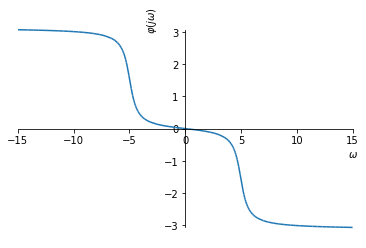

In [14]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

**Ejercicio**

* Cambie el coeficiente de amortiguamiento $c$ del péndulo elástico e indique cómo cambia la magnitud y la fase de la función de transferencia $H(j\omega)$.

* Qué relación hay entre la frecuencia de oscilación y las frecuencias de resonancia?

**Solución**
* Vamos a cambiar nuestro coeficiente de amortiguamiento por 1/20 y miraremos como cambia la magnitud y la fase de $H(j\omega)$.

In [15]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode #planteamos a EDO

mck = {m: 0.1, c: sym.Rational('.05'), k: sym.Rational('2.5')}
mck #Damos valores a m,k y c (utilizando nuestro nuevo c 0.05)

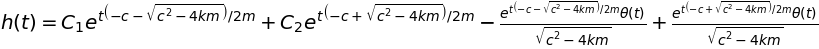

In [16]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h #Solucionamos la EDO

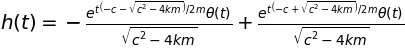

In [17]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants
h = solution_h.subs(integration_constants)
h #Hacemos 0 las constantes de integración 


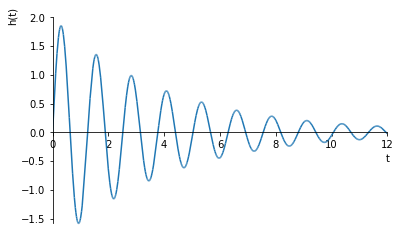

In [18]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)'); #Graficamos nuestro nuevo sistema 

Podemos observar la diferencia entre las dos gráficas y es que al variar el coeficiente de amortiguamiento $c$ en nuestro caso al hacerlo más pequeño. lo que logramos es que el sistema oscile más, concluyendo por lógica que a mayor coeficiente de amotiguamiento menor oscilaciones va a tener el sistema

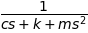

In [19]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H #Función de transferencia 

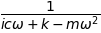

In [20]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

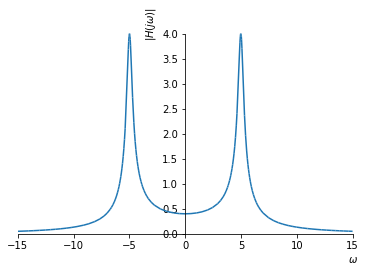

In [21]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Si observamos la gráfica la magnitud de nuetstra función de transferencia se duplicó (Con respecto a la original) ya que hicimos nuestro $c$ 1/2 de el $c$ original, la fase también cambia y en nuestro caso se hace más pequeña

* Ahora hablaremos de frecuencia de resonancia. Es aquella frecuencia caacterística de un cuerpo o un sistema que alcanza el grado máximo de oscilación, todo cuerpo o sistema tiene una, o varias, frecuencias características. Cuando un sistema es excitado a una de sus frecuencias características, su vibración es la máxima posible. El aumento de vibración se produce porque a estas frecuencias el sistema entra en resonancia. Por ende, podemos concluir que la frecuencia de resonancia son los puntos máximos de la frecuencia de oscilación 

### Aplicación: Aislamiento de vibraciones

Una aplicación del anterior ejemplo es el diseño de [aislamiento de vibraciones](https://en.wikipedia.org/wiki/Vibration_isolation) mediante un péndulo elástico amortiguado. Un ejemplo típico es una máquina de rotación con masa $m$ que tiene algún tipo de desequilibrio. Asumiendo que el desequilibrio puede ser modelado como una masa en rotación, la fuerza externa $F_\text{E}(t)$ está dada por la componente vertical de su [fuerza centrífuga](https://en.wikipedia.org/wiki/Centrifugal_force)

\begin{equation}
F_\text{E}(t) = F_0 \sin(\omega t) = F_0 \cdot \Im \{e^{j \omega t} \}
\end{equation}

Donde $\omega$ denota la frecuencia angular de la máquina rotatoria y

\begin{equation}
F_0 = m_\text{I} r \omega^2 
\end{equation}

Donde la amplitud de la fuerza con $m_\text{I}$ denota la masa del desequilibrio y $r$ el radio de su órbita circular. Dado que $e^{j \omega t}$ es una función propia de un SLTI, el resultado del desplazamiento está dado por

\begin{equation}
y(t) = F_0 \cdot \Im \{e^{j \omega t} H(j \omega) \}
\end{equation}

El objetivo del aislamiento de vibraciones es mantener la magnitud del desplazamiento lo más baja posible.

**Ejercicio**

* Calcule y grafique el desplazamiento para valores dados de $m_\text{I}$ y $r$.

* ¿Para qué frecuencias angulares $\omega$ se tiene una mayor magnitud del desplazamiento? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t)$ y el desplazamiento $y(t)$ en estas frecuencias?

* ¿Cómo deben elegirse las frecuencias de resonancia $\omega_0$ del péndulo de resorte para obtener un buen aislamiento de vibraciones para una máquina que gira con frecuencia angular $\omega$? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t) $ y el desplazamiento $y(t)$ a esta frecuencia?

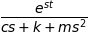

In [22]:
m1, r, w1 = sym.symbols('m1 r w1', real=True)
w = sym.symbols('omega', real=True)
H = sym.exp(s*t)*H

Fo = m1*r*(w1**2)

H

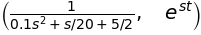

In [24]:
H1 = H.subs(mck)
H1.args

In [25]:
TI = sym.inverse_laplace_transform(H1.args[0], s, t).simplify()

Y = Fo*TI

Y


In [26]:
val = {m1: 0.1, r: 2, w1: sym.Rational('2.5')} #asignación de valores 
val


In [28]:
Ye = Y.subs(val)
Ye


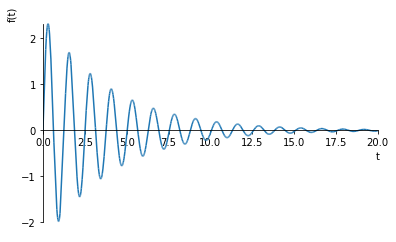

In [29]:
sym.plot(Ye, (t, 0, 20));


**Función de transferencia**

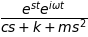

In [30]:
w = sym.symbols('omega', real=True)
H1 = sym.exp(sym.I*w*t)*H
H1